# Movie Recommendation Systems

August 4th 2023

## Team Members

**Simon Hui** (GitHub/Presentation Lead)
> simonh9963@gmail.com

**Sangyun (Yun) Thom** (Technical Lead)
> sangyun.thom@gmail.com

## Business Problem

Implementing a **recommendation system** is an eseential part of operating a movie streaming service platform. As a **new platform**, developing and tuning the recommendation system can improve the user experiences and engagement. The users get more personalized recommendations based on their previous experiences, which can enhance their engagement to the streaming service platform. Also, general user preferences can be collected internally to improve user satisfaction. However, it can be problematic when a new user signs up to the platform, because historical data for this specific user is not available. This is referred to as the **cold start problem**.

The current project aims to provide **genre driven recommendations** to the new users without initial movie ratings from the user. Also, after initial input of the new user's movie ratings, we aim to implement different recommendation system to provide movie recommendations based on the initial rating.

**Our overall goal** is to provide 5 movie recommendations to the new user based on the genre prefernce and movie rating information provided.

## Data Overview

The movie ratings data has been retreived from [MovieLens](https://grouplens.org/datasets/movielens/latest/). Specifically, the **small** dataset with 100k ratings, over 9k movies, and 600 users is utilized for the current project. Movies are assigned different genres, and release year of the movies range from early 1900's to 2018. It was last updated in September of 2018.

### Brief explorating

The data are separated into two CSV files: **movies.csv** and **ratings.csv**. Here, we briefly look at these two files to get a quick look at what is contained in each file.

In [1]:
# Importing necessary packages for following analyses
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
# Read our first CSV file
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [5]:
ratings = pd.read_csv("ratings.csv")

ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


One notable thing from breif exploration is that both files have **no null values** to impute or remove. Also, the **movieId** column appears in both files; thus, it can be used to merge these two together. 

## Feature Engineering

### 1. `year` column to extract the movie release year

If the release year is identified at the end of the movie title, we extract the release year and store the information in a separate column.

In [8]:
# Function to extract years
def extract_years(movie):
    """
    Extract the release year of the movie by taking 4 digits of numerals in parentheses at 
    the end of the title. 
    
    Parameter:
        movie: string
    Returns: 
        year: integar. If it is not defined, the ouput is 0 as a missing value.
    """
    year_digits = movie.rstrip(" )")[-4:]

    if year_digits.isdigit():
        year = int(year_digits)
    else:
        year = 0
    return year

In [9]:
# Release year extraction
movies['year'] = movies['title'].apply(extract_years)

movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


As shown above via the `.head()` method, the `year` column has been created with the release year.

### 2. Merge `movies` and `ratings` CSV files together

Now that we have the release year column, we merge two files together on the `movieId` column, as we explored earlier.

In [10]:
movies = pd.merge(movies, ratings, on='movieId', how='inner')

movies.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1305696483


### 3. Separate `genres` into individual columns

In [11]:
movies['genres'] = movies['genres'].str.split("|")
movies.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1,4.0,964982703
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,5,4.0,847434962
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,7,4.5,1106635946
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,15,2.5,1510577970
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,17,4.5,1305696483


After the `genres` column has a list of genres assigned to the given movie, we use [MultiLabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html) to encode each genre into a column with binary values (0 indicates not assigned to the genre, and 1 indicates the given genre assigned).

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer

# Encode with the MultiLabelBinarizer model
mlb = MultiLabelBinarizer()
binary_encoded_genres = mlb.fit_transform(movies['genres'])

# Extract the genre names as a list
genre_names = list(mlb.classes_)

# Concatenate with our merged dataframe
binary_encoded_df = pd.DataFrame(binary_encoded_genres, columns=genre_names)
movies = pd.concat([movies, binary_encoded_df], axis=1)

movies.tail()

,movieId,title,genres,year,userId,rating,timestamp,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
100831,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",2017,184,4.0,1537109082,0,1,0,...,0,0,0,0,0,0,0,0,0,0
100832,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",2017,184,3.5,1537109545,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100833,193585,Flint (2017),[Drama],2017,184,3.5,1537109805,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100834,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",2018,184,3.5,1537110021,0,1,0,...,0,0,0,0,0,0,0,0,0,0
100835,193609,Andrew Dice Clay: Dice Rules (1991),[Comedy],1991,331,4.0,1537157606,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
movies['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Based on the `.describe()` method, the rating appears to be **between 0.5 and 5.0**.

Now, another factor to explore before completing data analyses is if there is a catch-all genre category for unknown genres for movies that did not get assigned to a specific genre.

In [14]:
movies['(no genres listed)'].value_counts()

(no genres listed)
0    100789
1        47
Name: count, dtype: int64

There seems to be 47 movie rating entries with `no genres listed` out of more than 100k entries. Since this number is very miniscule, we decide to remove rating with the `no genres listed`.

In [15]:
genre_names.remove('(no genres listed)')
movies = movies.loc[movies['(no genres listed)'] == 0]
movies.head()

,movieId,title,genres,year,userId,rating,timestamp,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1,4.0,964982703,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,5,4.0,847434962,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,7,4.5,1106635946,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,15,2.5,1510577970,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,17,4.5,1305696483,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis (EDA)

### 1. Release year counts

Here, we want to explore how many movie ratings are present in the dataset across movie release years. First, we explore entries that have `0` as `year`. This may include movies that did not specify the release year in the title.

In [16]:
# Movies with undefined release year
movies.loc[movies['year'] == 0]

,movieId,title,genres,year,userId,rating,timestamp,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
81292,40697,Babylon 5,[Sci-Fi],0,210,4.0,1527266191,0,0,0,...,0,0,0,0,0,0,1,0,0,0
81293,40697,Babylon 5,[Sci-Fi],0,528,0.5,1391736467,0,0,0,...,0,0,0,0,0,0,1,0,0,0
99325,140956,Ready Player One,"[Action, Sci-Fi, Thriller]",0,209,3.5,1524522239,0,1,0,...,0,0,0,0,0,0,1,1,0,0
99326,140956,Ready Player One,"[Action, Sci-Fi, Thriller]",0,305,4.5,1533043577,0,1,0,...,0,0,0,0,0,0,1,1,0,0
99327,140956,Ready Player One,"[Action, Sci-Fi, Thriller]",0,380,3.0,1534176158,0,1,0,...,0,0,0,0,0,0,1,1,0,0
99328,140956,Ready Player One,"[Action, Sci-Fi, Thriller]",0,514,3.0,1533946119,0,1,0,...,0,0,0,0,0,0,1,1,0,0
99617,149334,Nocturnal Animals,"[Drama, Thriller]",0,306,3.0,1518380372,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100051,162414,Moonlight,[Drama],0,462,5.0,1478489531,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Then, we plot a line graph representing the number of movie ratings from 1960 to 2018, since the movies released during this time-period are more relevant to our movie streaming platform as movie recommendations.

Text(0, 0.5, 'Number of Movie Ratings')

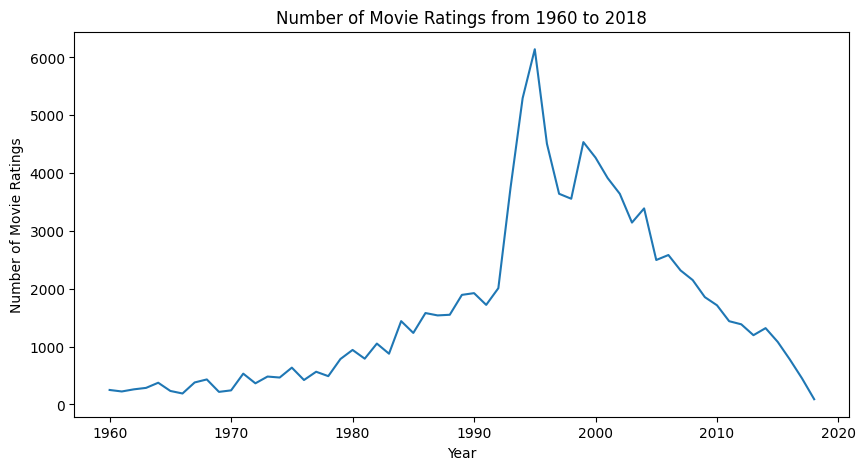

In [17]:
# Line graph of number of movies per eyar from 1960 to 2018
grouped_year = movies.loc[movies['year'] >= 1960].groupby("year")
year_counts = dict(grouped_year['movieId'].count())

fig, ax = plt.subplots(figsize=(10,5))
x = year_counts.keys()
y = year_counts.values()
ax.plot(x, y)
ax.set_title("Number of Movie Ratings from 1960 to 2018")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Movie Ratings")

**Interpretation**: most of movie ratings are focusing on movies released between 1980s and early 2000s. Please note that these numbers are referring to the number of movies. The numbers are representing movie rating entries, which may include duplicates of movies, rated by different users.

### 2. Number of movie ratings and median ratings per genre

Since we aim to provide a genre-driven movie recommendations to the new users, we want to explore the data based on different genres. Here, we explore the number of movie ratings per genre, and distribution of movie ratings.

In [18]:
# Counts of ratings per each genre
genre_count = {}
for genre in genre_names:
    genre_count[genre] = len(movies.loc[movies[genre] == 1])

genre_count

{'Action': 30635,
 'Adventure': 24161,
 'Animation': 6988,
 'Children': 9208,
 'Comedy': 39053,
 'Crime': 16681,
 'Documentary': 1219,
 'Drama': 41928,
 'Fantasy': 11834,
 'Film-Noir': 870,
 'Horror': 7291,
 'IMAX': 4145,
 'Musical': 4138,
 'Mystery': 7674,
 'Romance': 18124,
 'Sci-Fi': 17243,
 'Thriller': 26452,
 'War': 4859,
 'Western': 1930}

In [19]:
# 5 most reviewed movies
top_5_genres = [genre[0] for genre in sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:6]]
top_5_genres

['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Romance']

Text(0.5, 0.01, 'Rating')

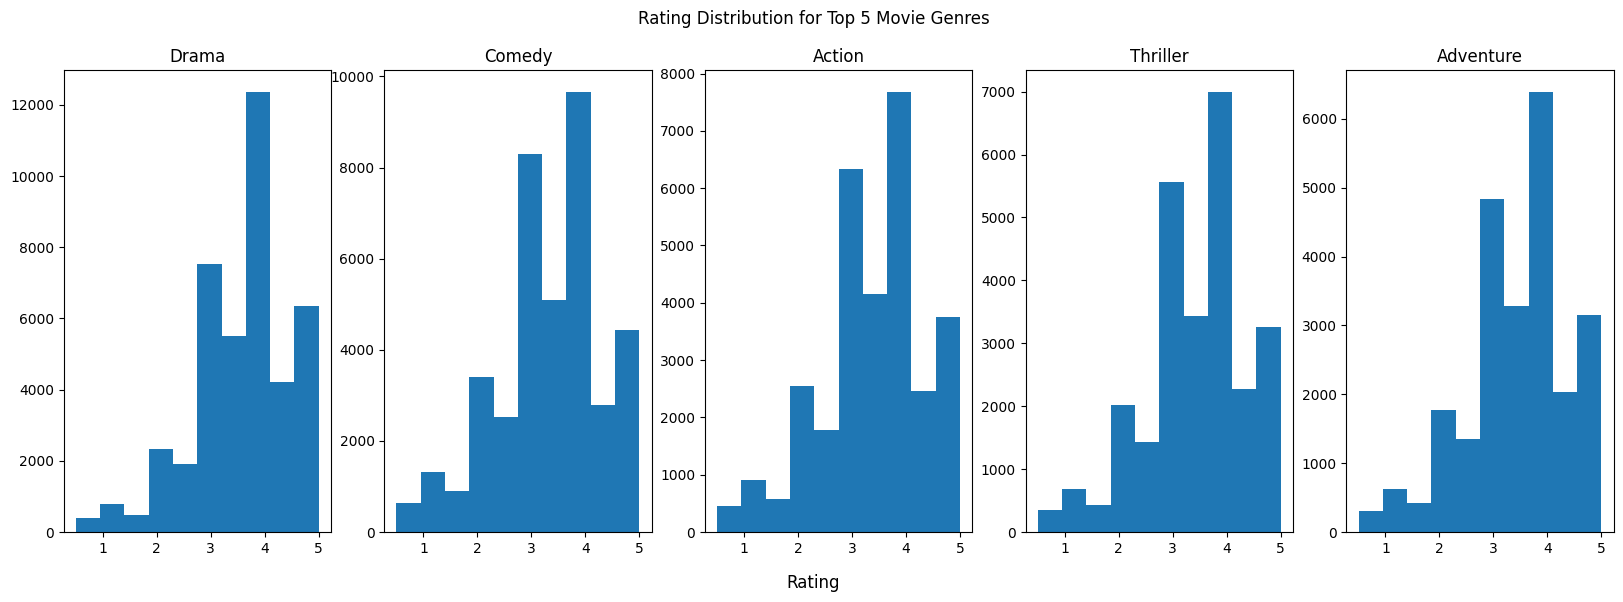

In [20]:
# Rating distribution of top 5 movie genres
fig, axes = plt.subplots(1,5, figsize=(20,6))

for i in range(5):
    genre = top_5_genres[i]
    axes[i].hist(movies.loc[movies[genre] == 1]['rating'])
    axes[i].set_title(genre)

fig.suptitle("Rating Distribution for Top 5 Movie Genres")
fig.supxlabel("Rating")


In [21]:
# Median ratings
for genre in genre_names:
    print(f"Median rating of {genre}: {movies.loc[movies[genre] == 1]['rating'].median()}")

Median rating of Action: 3.5
Median rating of Adventure: 3.5
Median rating of Animation: 4.0
Median rating of Children: 3.5
Median rating of Comedy: 3.5
Median rating of Crime: 4.0
Median rating of Documentary: 4.0
Median rating of Drama: 4.0
Median rating of Fantasy: 3.5
Median rating of Film-Noir: 4.0
Median rating of Horror: 3.5
Median rating of IMAX: 4.0
Median rating of Musical: 3.5
Median rating of Mystery: 4.0
Median rating of Romance: 3.5
Median rating of Sci-Fi: 3.5
Median rating of Thriller: 3.5
Median rating of War: 4.0
Median rating of Western: 4.0


**Intrepreation**: ratings for each genre tends to be skewed slightly, and the median rating is between 3.5 and 4.0 regardless of the genre.

### 3. Top 20 most rated movies

Regardless of the genre, some movies will be more popular than others. Here, we aim to identify some most popular movies, by examining number of rating entries for the given movie.

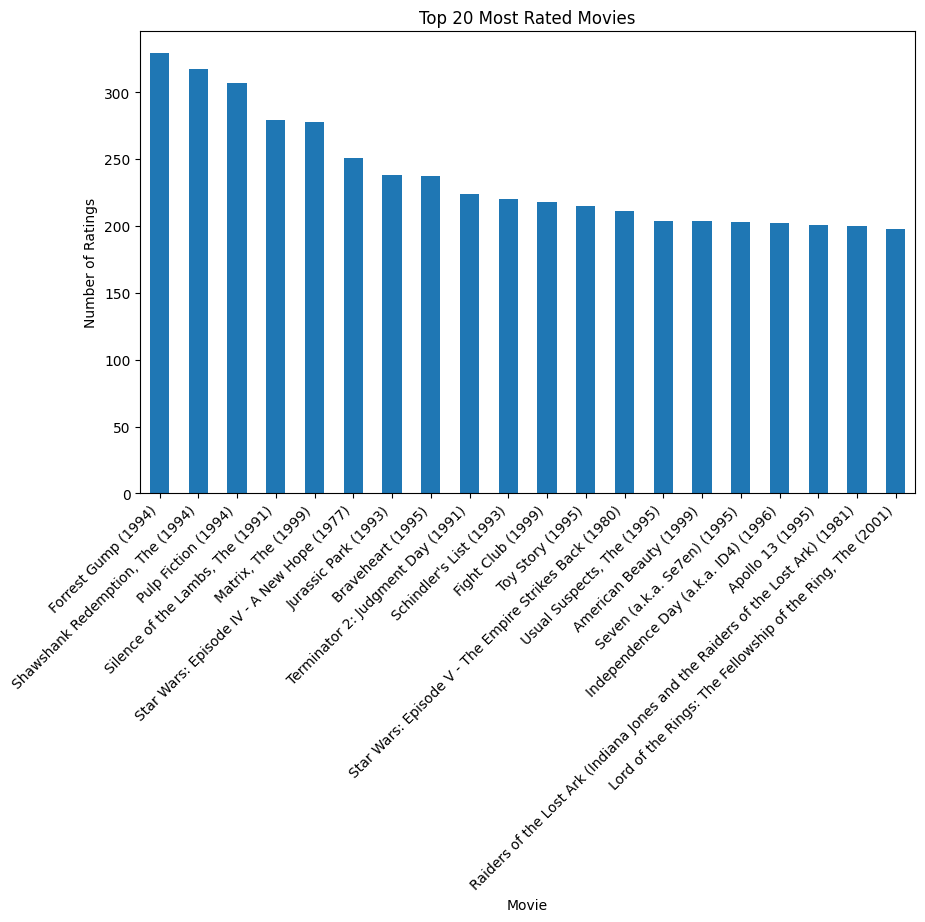

In [22]:
# Bar graph on top 20 most rated movies and number of ratings
rating_counts = movies.groupby('title')['rating'].count()
plt.figure(figsize=(10, 6))
rating_counts.sort_values(ascending=False).head(20).plot(kind='bar')
plt.xlabel('Movie')
plt.ylabel('Number of Ratings')
plt.title('Top 20 Most Rated Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

**Interpretation**: looking at the list of top 20 most rated movies, they are mainly between 1980s and 2000s.

### 4. Superusers per genre

Lastly, we want to examine our superusers in our data set to determine if we should keep them in the data for the movie recommendation system, or remove them. We determine the superusers by looking at the number of rating provided per user Id, and examine if these ratings exceed a certain threshold percentage of a specific genre. The threshold we used to determine the sueruser of a given genre is **90%**.

In [23]:
# Number of ratings per user Id
user_ratings_count = movies['userId'].value_counts().reset_index()
user_ratings_count.columns = ['userId', 'ratings_count']
user_ratings_count = user_ratings_count.sort_values(by = 'ratings_count', ascending=False)

user_ratings_count.head()

,userId,ratings_count
0,414,2696
1,599,2474
2,474,2108
3,448,1862
4,274,1346


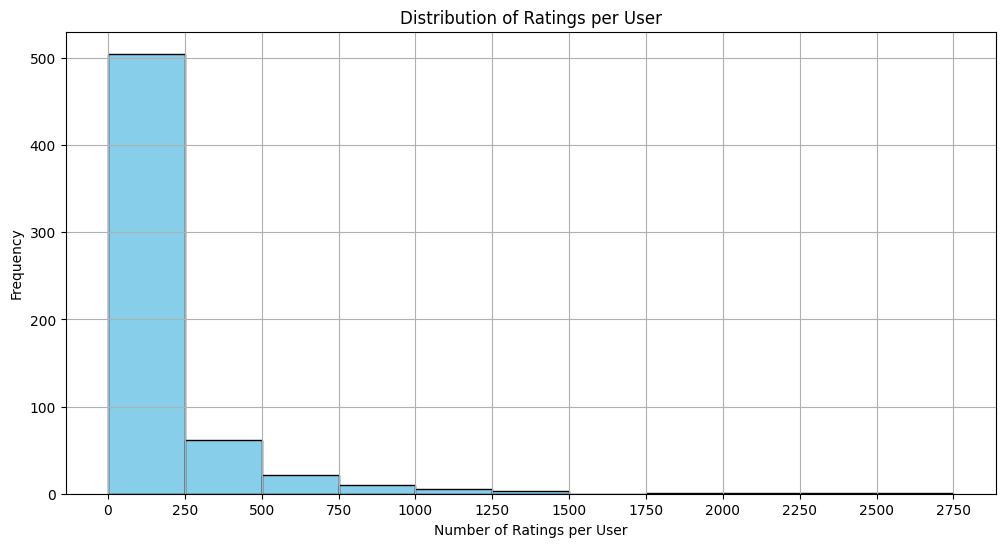

In [24]:
# Plot distribution of ratings per user
plt.figure(figsize=(12,6))
bin_width=250
bins=range(0, user_ratings_count['ratings_count'].max() + bin_width, bin_width)
plt.hist(user_ratings_count['ratings_count'], bins=bins, color='skyblue', edgecolor='black')
plt.xticks(bins)
plt.xlabel('Number of Ratings per User')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings per User')
plt.grid(True)
plt.show()

In [25]:
# Superusers with threshold percentage of 90 in each genre
user_movie_count = movies.groupby('userId')['movieId'].count().reset_index()
user_movie_count.rename(columns={'movieId': 'total_movies_rated'}, inplace=True)

user_genre_count = movies.groupby('userId')[genre_names].sum().reset_index()

superusers = {}
threshold_percentage = 90

for genre in genre_names:
    user_genre_count[f'{genre}_percentage'] = (user_genre_count[genre] / user_movie_count['total_movies_rated']) * 100
    superusers[genre] = user_genre_count[user_genre_count[f'{genre}_percentage'] >= threshold_percentage]['userId'].tolist()

superusers

{'Action': [],
 'Adventure': [],
 'Animation': [],
 'Children': [],
 'Comedy': [89, 564],
 'Crime': [],
 'Documentary': [],
 'Drama': [162],
 'Fantasy': [],
 'Film-Noir': [],
 'Horror': [571],
 'IMAX': [],
 'Musical': [],
 'Mystery': [],
 'Romance': [],
 'Sci-Fi': [149],
 'Thriller': [297],
 'War': [],
 'Western': []}

**Interpretation**: There are some superusers that provided over 90% of movie ratings for a specific genre.

While these superusers can highly influence how our movie recommendation system evaluate each genre, we decide to keep them in the data for the recommendation system because the data set we have currently is rather too small. If we remove the superusers from the data, it would result in excluding several genres completely from the recommendation system. Until our start-up movie streaming platform can gather more information from users, we are keeping the superusers in the data.

##  Feature Engineering Continued
### 4. Genre preference of individual users to recommend movies to a new user only with genre preference

Since our business problem is genre-driven, we want to see genre preference of individual users. We create a separate dataframe with each user as an entry, and all genres as variables via [Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html). We calculate the median ratings for each genre from individual users. The **threshold** of preference is set as **4.0**, which means that the genre preference is considered when the median rating for a given genre is higher than 4.0. **1** from the final dataframe `genre_pref_df` represents genre preference.

In [26]:
# median values of individual users for each genre
median_ratings = {}
for genre in genre_names:
    median_ratings[genre] = movies.loc[movies[genre] == 1].groupby('userId')['rating'].median()

user_ratings_df = pd.DataFrame(median_ratings).reset_index()

user_ratings_df.head()

,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,4.0,5.0,5.0,5.0,4.0,5.0,NaN,5.0,4.0,5.0,4.00,NaN,5.0,5.0,4.0,4.00,4.0,5.0,4.0
1,2,4.0,4.0,NaN,NaN,4.0,4.0,5.0,4.0,NaN,NaN,3.00,3.75,NaN,4.0,4.5,3.75,4.0,4.5,3.5
2,3,4.5,3.0,0.5,0.5,0.5,0.5,NaN,0.5,4.0,NaN,4.75,NaN,0.5,5.0,0.5,5.00,5.0,0.5,NaN
3,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.5,4.00,3.00,4.0,4.0,3.5,2.50,4.0,4.0,4.0
4,5,3.0,3.0,4.5,4.0,3.0,4.0,NaN,4.0,4.0,NaN,3.00,3.00,5.0,4.0,3.0,2.50,4.0,4.0,3.0


In [27]:
# preprocess to get the genre preference

from sklearn.preprocessing import Binarizer

threshold = 4.0

# getting the genre columns only
genre_columns = user_ratings_df.drop(["userId"], axis=1).fillna(0)

# fit and transform via Binarizer
binarizer = Binarizer(threshold=threshold, copy=True)
genre_columns = binarizer.fit_transform(genre_columns)

# genre columns with preference
genre_pref_df = pd.DataFrame(genre_columns, columns=binarizer.get_feature_names_out())

# user Id column
user_id = user_ratings_df['userId']

# concatenate both
genre_pref_df = pd.concat([user_ratings_df['userId'], genre_pref_df], axis=1)
genre_pref_df.head()

,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Scenario 1**: Movie Recommendations to a New User immediately **after signing up**

For our recommendation system, we provide two different scenarios: 1) when a new user signs up and has not provided us with any movie ratings, and 2) when this new user provides us with the first movie rating. Realistically, new users will not start rating movies immediately after signing up, and that’s why the **"personalizing your preferences page"** is important for recommendation system. We would gather the new user's genre preference from the personalizing year preferences page immediately following signing up.

Let's add our new user to the genre preference matrix. Our new user, Simon, has selected **Action**, **Adventure**, and **Mystery** as preferred genres upon signing up to the streaming service platform.

### Add the new user information to the genre preference dataframe

In [28]:
def add_new_user(new_user, df):
    """
    Add the new user information to the dataframe.

    Parameters:
        new_user (dictionary): Information on the new user to be added to the dataframe. 
        df (pandas.DataFrame): Base dataframe.
    Returns:
        df (pandas.DataFrame): Base dataframe with the new information added at the end. Missing values are filled with 0.
    """
    import pandas as pd
    
    new_user_df = pd.DataFrame(new_user, index=[0])
    new_genre_pref_df = pd.concat([df, new_user_df], axis=0).reset_index(drop=True)
    
    return new_genre_pref_df.fillna(0)

In [29]:
# Manually inputed new user Id and genre preferences
new_user = {'userId': 611, 'Action': 1, 'Adventure': 1, 'Mystery': 1}

new_genre_pref_df = add_new_user(new_user, genre_pref_df)

new_genre_pref_df.tail()

,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
606,607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
607,608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
609,610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,611,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Our new user has been added at the bottom of the dataframe, and is assigned `611` as the `userId`.

## **First model** for recommendation: Find similar user(s) based on **Pearson Correlation Coefficient**

For our first scenario, we find correlations between all pre-existing users and the new user to find the users with similar genre preferences. From them, top rated movies are recommended to the new user.

### Find most correlated users

In [30]:
def find_similar_user_idx(target_user, df):
    """
    Run Pearson correlation coefficients between individual users to find 5 most highly correlated users.

    Parameters:
        target_user (int): User Id of the target user.
        df (pandas.DataFrame): Dataframe with binary genre preferences.
    Returns:
        list: indexes of 5 most highly correlated users to the target user.
    """
    target_coef = pd.DataFrame(np.corrcoef(df.drop("userId", axis=1)))[target_user-1]
    target_coef = target_coef.sort_values(ascending=False).fillna(0)
    similar_users_idx = list(dict(itertools.islice(target_coef.items(), 6)).keys())
    similar_users_idx.remove(target_user-1)

    return similar_users_idx

In [31]:
# Find 5 most correlated users via pearson correlation coefficient
similar_users_idx = find_similar_user_idx(target_user=611, df=new_genre_pref_df)
similar_users_idx

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


[577, 334, 336, 135, 373]

### Select the most highly rated movies from each similar user

In [32]:
def rec_from_similar_users(user_id, df, sample_num):
    """
    Find movie titles that are the most highly rated by a given user in the dataframe.

    Parameters:
        user_id (int): User Id of the target user
        df (pandas.DataFrame): Base dataframe.
        sample_num (int): Number of samples to obtain from one user.
    Returns:
        string. Title of the recommended movie.
    """
    similar_df = df.loc[df['userId'] == user_id]
    max_rating = similar_df['rating'].max()
    movie_rec_title = similar_df.loc[similar_df['rating'] == max_rating].sample(n=sample_num, replace=False)['title']
    
    return movie_rec_title.values[0]

In [33]:
# Recommended movie titles from each similar user
corrcoef_movie_rec = []

for user_idx in similar_users_idx:
    user_id = user_idx+1
    corrcoef_movie_rec.append(rec_from_similar_users(user_id=user_id, df=movies, sample_num=1))

corrcoef_movie_rec

["King's Speech, The (2010)",
 'Matrix, The (1999)',
 'Willy Wonka & the Chocolate Factory (1971)',
 'I.Q. (1994)',
 'Braveheart (1995)']

# **Scenario 2**: Movie Recommendations after the **First Movie Rating** from the New User

## **Second Model**: `KNNBasic` to get similar users and movie recommendations

### Find the best `KNNBasic` model

The new user is expected to provide the streaming service platform with movie rating information as time passes. Once this information is received, different approaches can be taken to provide more tailored movie recommendations. We try three different parameters to determine the closest neighbors: `MSD`, `pearson`, and `cosine`.

In [34]:
# Read in data and train test split
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise.accuracy import mae
from surprise import BaselineOnly

reader = Reader(rating_scale = (0.5, 5))
knn_data = Dataset.load_from_df(movies[['userId', 'movieId', 'rating']], reader=reader)

# train test split for knn because CV takes way too long...
train, test = train_test_split(knn_data, random_state=42)

In [35]:
# First option: 'MSD'
sim_options = {'name': 'MSD',
               'user_based': True
               }
knn = KNNBasic(sim_options = sim_options).fit(train)
knn.test(test)
mae(knn.test(test))

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7164


0.7163800092239023

In [36]:
# Second option: 'pearson'
sim_options_pearson = {'name': 'pearson',
               'user_based': True
               }
knn_pearson = KNNBasic(sim_options = sim_options_pearson).fit(train)
knn_pearson.test(test)
mae(knn_pearson.test(test))

Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.7436


0.7436360350206213

In [37]:
# Third option: 'cosine'
sim_options_cosine = {'name': 'cosine',
               'user_based': True
               }
knn_cosine = KNNBasic(sim_options = sim_options_cosine).fit(train)
knn_cosine.test(test)
mae(knn.test(test))

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7164


0.7163800092239023

We determine that `MSD` or `cosine` parameter yields smaller mean absolute error; thus, we decide to use one of these parameters for our `KNNBasic` model.

### `KNNBasic` model after adding our new user's movie rating

Now, our new user has watched a movie and decided to provide a rating.

In [38]:
# Manually inputed movie rating information from the new user
new_rating = {'movieId': 74458, 'title': 'Shutter Island (2010)', 
            'year': 2010, 'userId': 611, 'rating': 5.0,
            'Drama': 1, 'Mystery': 1, 'Thriller': 1}

# Add to the base dataframe
new_movies = add_new_user(new_rating, movies)
new_movies.tail()

,movieId,title,genres,year,userId,rating,timestamp,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
100785,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",2017,184,3.5,1.537110e+09,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
100786,193585,Flint (2017),[Drama],2017,184,3.5,1.537110e+09,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
100787,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",2018,184,3.5,1.537110e+09,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
100788,193609,Andrew Dice Clay: Dice Rules (1991),[Comedy],1991,331,4.0,1.537158e+09,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
100789,74458,Shutter Island (2010),0,2010,611,5.0,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,0.0,0.0


In [39]:
# Run KNNBasic model after train test split
data_new = Dataset.load_from_df(new_movies[['userId', 'movieId', 'rating']], reader=reader)

train_new, test_new = train_test_split(data_new, random_state=42)

knn = KNNBasic(sim_options = sim_options).fit(train_new)
knn.test(test_new)
mae(knn.test(test_new))

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7185


0.7185413149819617

### Find closest neighbors and get movie recommendations from them

In [40]:
# Get closest neighbors to our new user
user_id = 611 # user Id of our new user

user_inner_id = train_new.to_inner_uid(user_id)
user_neighbors = knn.get_neighbors(user_inner_id, k=5)
user_neighbors

[6, 73, 140, 183, 213]

Users with Ids `6`, `73`, `140`, `183`, and `213` are identified as the most closely located neighbors in `KNNBasics` model.

Next, we retreive total of 5 movie recommendations from these neighbor users, using the same custome function `rec_from_similar_users()`, which we define earlier.

In [41]:
knn_movie_rec = []

for user in user_neighbors:
    knn_movie_rec.append(rec_from_similar_users(user_id=user, df=new_movies, sample_num=1))

knn_movie_rec

['Dances with Wolves (1990)',
 'Guardians of the Galaxy (2014)',
 'Hunt for Red October, The (1990)',
 'Hunt for Red October, The (1990)',
 'Big Fish (2003)']

## **Third model**: `SVD` to get expected ratings for other movies from the new user

### Run `SVD` model

Instead of relying on other similar users, we can predict movie ratings of other movies in the dataset from the new user. We utilize `SVD` model from the `surprise` package.

In [42]:
import surprise
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [43]:
svd = SVD(random_state=42)

In [44]:
cross_validate(svd, data_new, measures=['RMSE', 'MAE'])

{'test_rmse': array([0.86326747, 0.87764268, 0.8766761 , 0.88209038, 0.87106486]),
 'test_mae': array([0.66141261, 0.67316686, 0.67835808, 0.67684598, 0.66827224]),
 'fit_time': (0.5695228576660156,
  0.6286346912384033,
  0.5517339706420898,
  0.5602788925170898,
  0.52010178565979),
 'test_time': (0.0457310676574707,
  0.04504108428955078,
  0.04651212692260742,
  0.04686903953552246,
  0.04678511619567871)}

In [45]:
svd.fit(train_new)
mae(svd.test(test_new))

MAE:  0.6663


0.6663255792841051

Compared to the `KNNBasic` model, `SVD` model has smaller MAE metric. Therefore, we decide on the **`SVD` model as our final model**. It predicts what the new user would rate for individual movies, based on the first movie rated by the new user.

### Predicting ratings of the new user for all movies

In [46]:
movie_id = list(movies['movieId'].value_counts().index)

In [47]:
def predict_ratings(model, user_id, movie_id):
    """
    Generate predictions on the movie ratings from the target user and order the outcomes.

    Parameters:
        model (estimator): Recommendation system model to be used to predict.
        user_id (int): The target user.
        movie_id (list): Ids from the movies to be predicted.
    Returns:
        dictionary. movie Ids and predicted ratings in descending order of the ratings.
    """
    predictions = {}
    for movie in movie_id:
        predictions[movie] = model.predict(user_id, movie)[3]
    ordered_predictions = {key: value for key, value in sorted(predictions.items(), key=lambda x: x[1], reverse=True)}

    return ordered_predictions


In [48]:
def movie_recommendation(ratings, num):
    """
    Take most highly rated movies to recommend.

    Parameters:
        ratings (dict): Ordered movie Ids and predicted ratings.
        num (int): Number of recommendations.
    Returns:
        list. Titles of the movie recommendations
    """
    recomm_movie_id = list(dict(itertools.islice(ratings.items(), num)).keys())

    movie_list = []

    movie_list.append(new_movies.loc[new_movies['movieId'].isin(recomm_movie_id)]['title'].unique())

    
    return movie_list

In [49]:
movie_recommendation(ratings=predict_ratings(model=svd, user_id=611, movie_id=movie_id), num=5)

[array(["Schindler's List (1993)",
        'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)',
        "One Flew Over the Cuckoo's Nest (1975)", 'Brazil (1985)',
        'Apocalypse Now (1979)'], dtype=object)]

These movies are 5 recommendations based on the new user's first movie rating. Movie ratings for all movies in the data set are predicted and top 5 most highly rated movies are selected for recommendations.

## Business Recommendations

Based on the recommendation system developed above, here are some actionable recommendations to our stakeholders:

1. Increase **accessibility** of movie recommendations by placing at the top of the webpage.

2. Provide **feedback** survey or an icon to click on, to give us feedback on the performance of movie recommendations.

3. Include actors, actresses, and directors' information to **diversify** future movie recommendations.

## Future Directions

Here are some insights for future directions, to enhance the recommendtion system further.

1. Consider focusing on movies released in **recent years**, since our current recommendations are mostly between 1980s and early 2000s.

2. Investigate effects of different **devices** on movie preferences. For example, users may prefer to watch action movies on a TV, but comedy on a phone or tablet.

3. Include demographic information, such as age, gender and location, of the users.

4. Evaluate the selection rate, which is the rate of users actually engaging with the recommended movies. This can also help evaluate and tune the recommendation system.